# A graph of the proportion of nodes classified as zero or one

## Setup

In [1]:
CSV_NAME = "sum-gnn.csv"
GNN_NAME = "SumGNN"
NUM_LAYERS = 3

In [2]:
import os
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter

import pandas as pd

import matplotlib.pyplot as plt

In [3]:
SCRIPT_PATH = os.getcwd()
EXPERIMENTS_DIR = os.path.normpath(SCRIPT_PATH + "/..")
RESULTS_DIR = os.path.join(EXPERIMENTS_DIR, "results")

## Load the results

In [4]:
csv_path = os.path.join(RESULTS_DIR, CSV_NAME)
df = pd.read_csv(csv_path)

In [5]:
df = df[df["num_layers"] == NUM_LAYERS]

In [6]:
proportions = {}
num_nodes_list = []
for index, row in df.iterrows():
    if row["mpnn_idx"] not in proportions:
        proportions[row["mpnn_idx"]] = {}
    if row["num_nodes"] not in num_nodes_list:
        num_nodes_list.append(row["num_nodes"])
    proportions[row["mpnn_idx"]][row["num_nodes"]] = row["proportions"]

## Plot

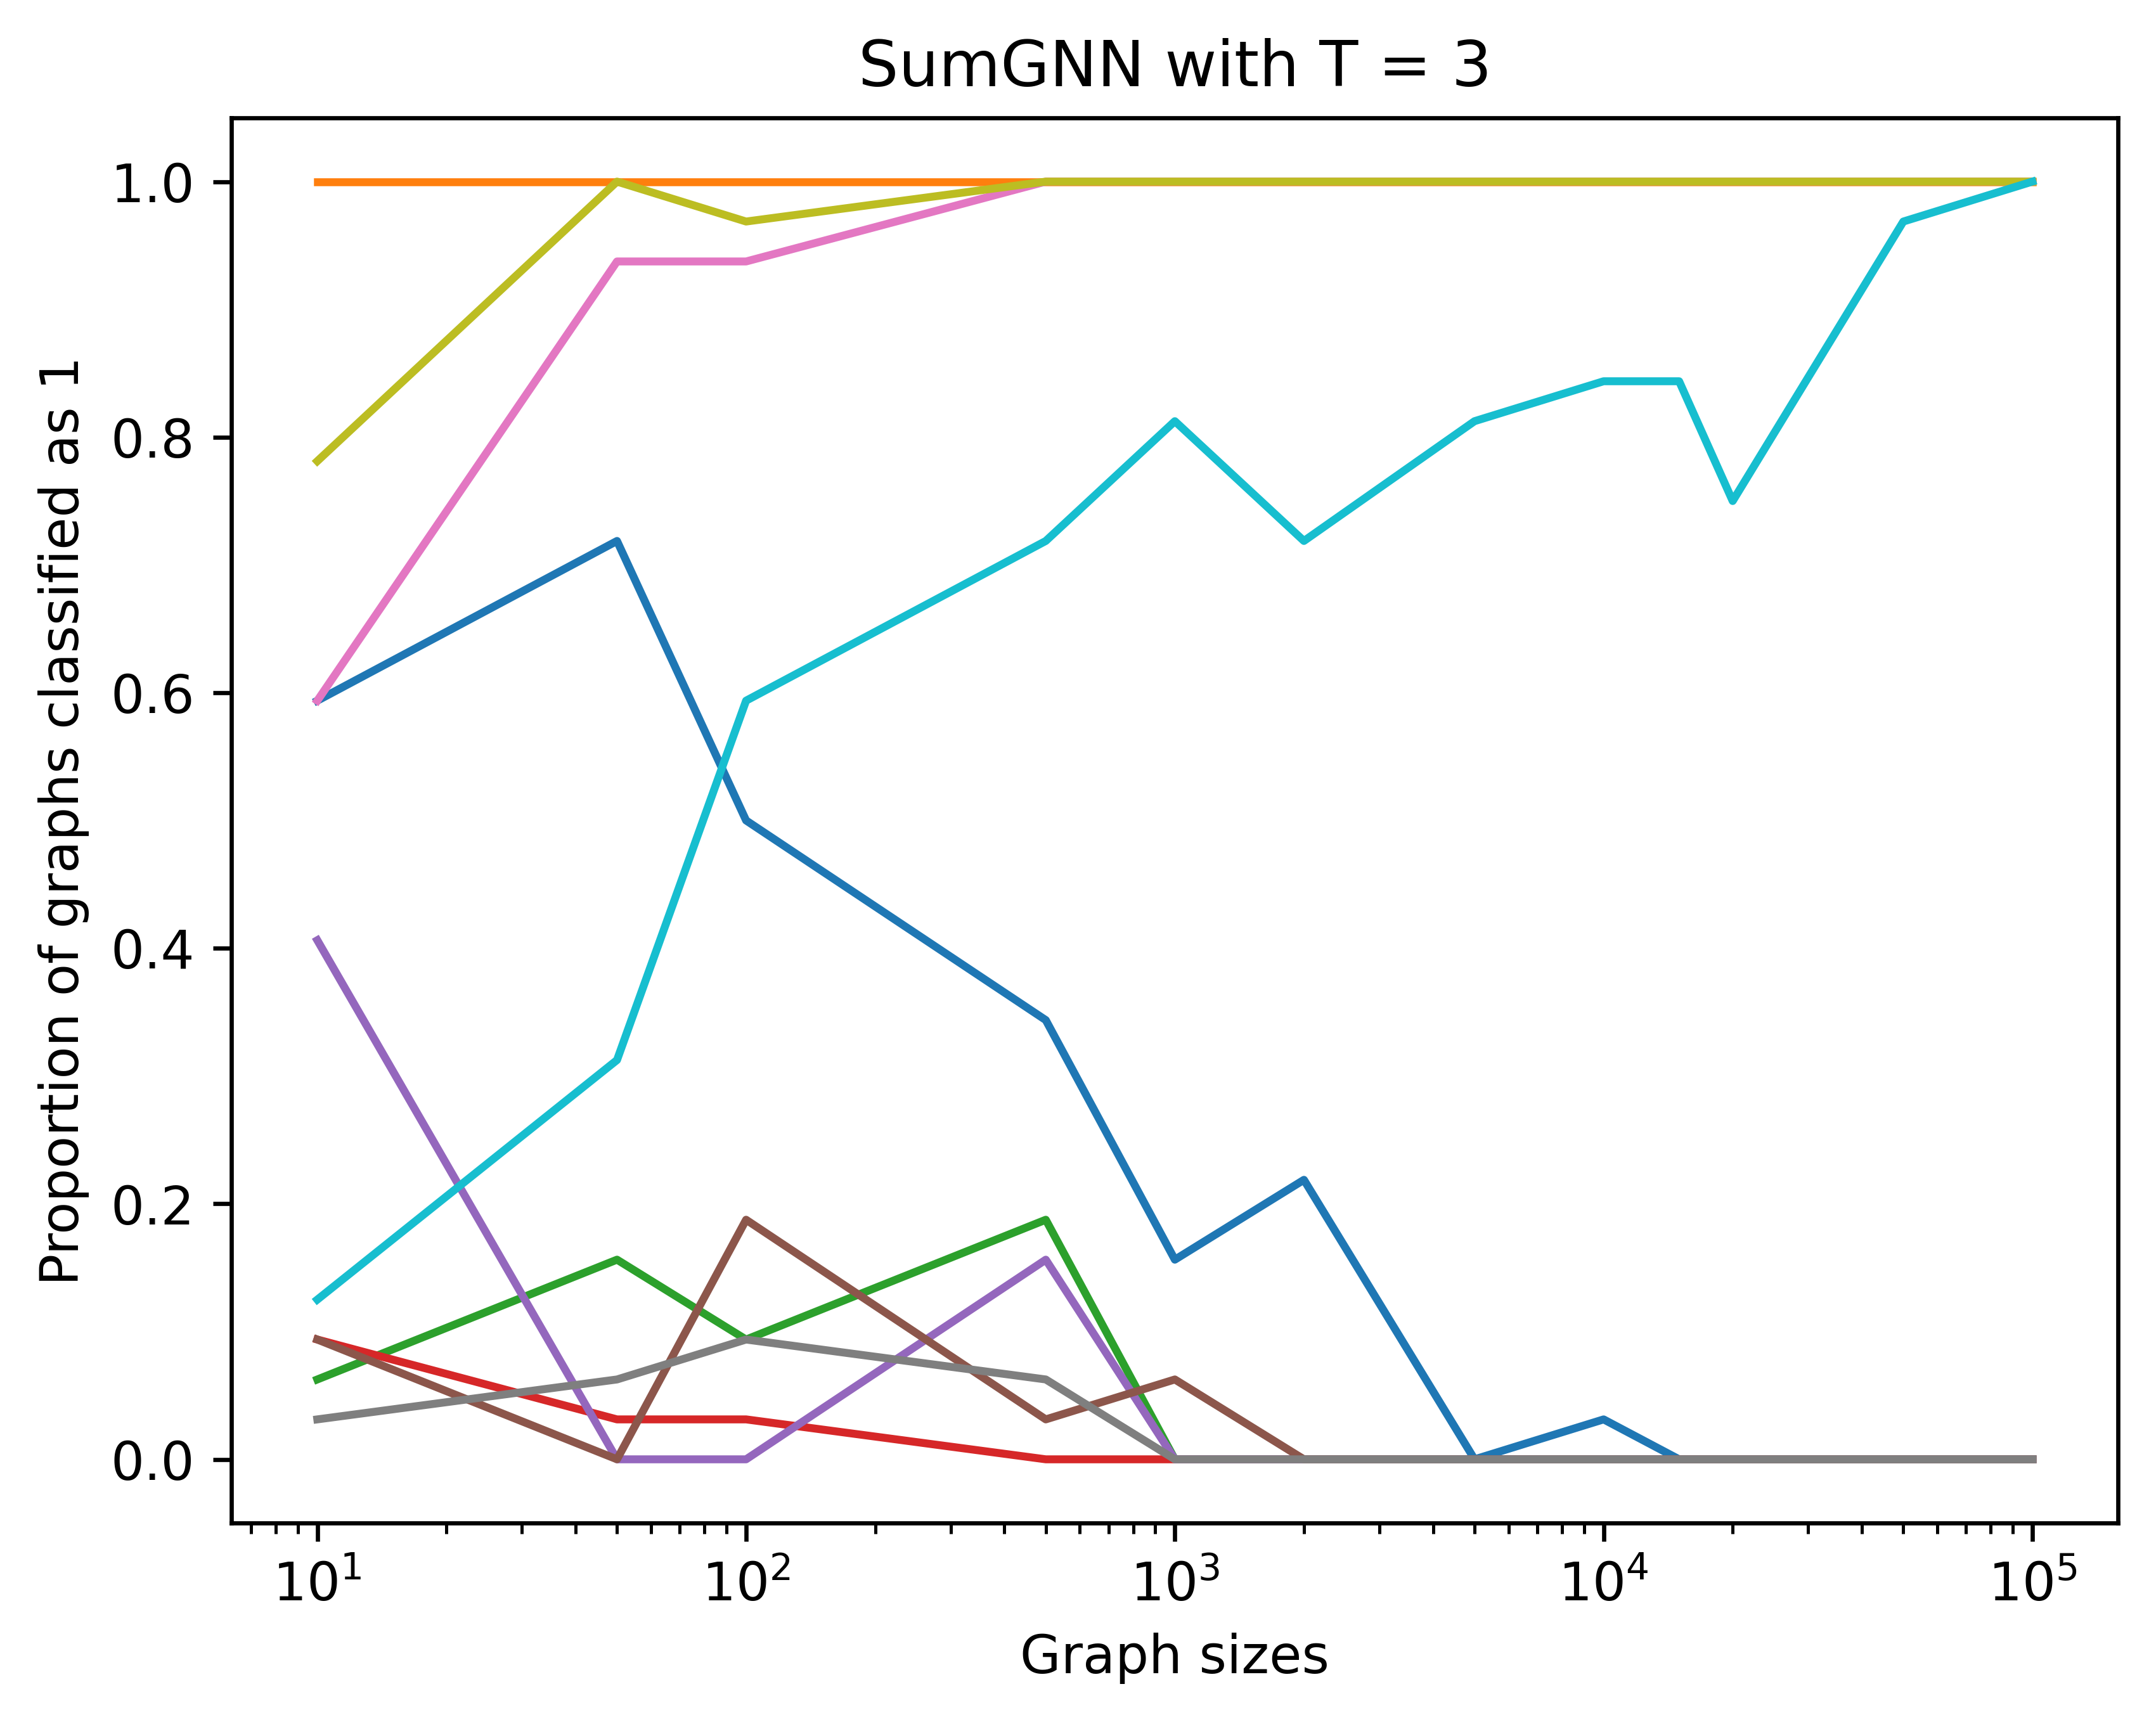

In [7]:
plt.rcParams['figure.dpi'] = 600
plt.figure()
for mpnn_idx, proportion_dict in proportions.items():
    plt.plot(
        num_nodes_list,
        [proportion_dict[num_nodes] for num_nodes in num_nodes_list],
    )

plt.xlabel("Graph sizes")
plt.ylabel("Proportion of graphs classified as 1")
plt.xscale("log")
plt.title(f"{GNN_NAME} with T = {NUM_LAYERS}")

plt.show()